In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path = Path("/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity")
path.ls()

[PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/readme.txt'),
 PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/.DS_Store'),
 PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/3'),
 PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/1'),
 PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/2'),
 PosixPath('/content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity/models')]

# Resnet 34

In [0]:
tfms = get_transforms(do_flip=True)

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24, valid_pct=0.2, bs = 32)

In [0]:
data.classes

['1', '2', '3']

In [0]:
bs = 64

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2357 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,3,3,3,3
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Valid: LabelList (589 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
2,2,1,2,2
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Test: None

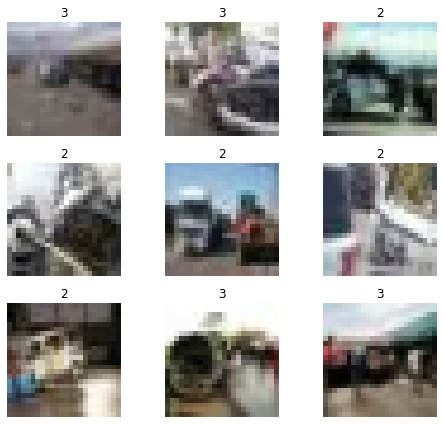

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
len(data.classes),data.c

(3, 3)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.635466,1.236197,0.431239,13:02
1,1.271948,0.903174,0.443124,00:18
2,0.995079,0.792101,0.382003,00:13
3,0.875383,0.784817,0.397284,00:14


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

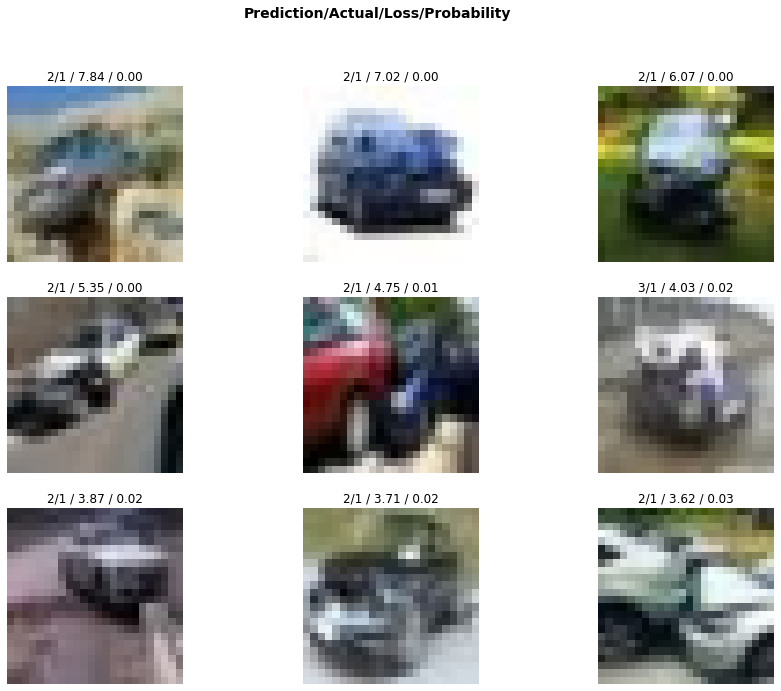

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

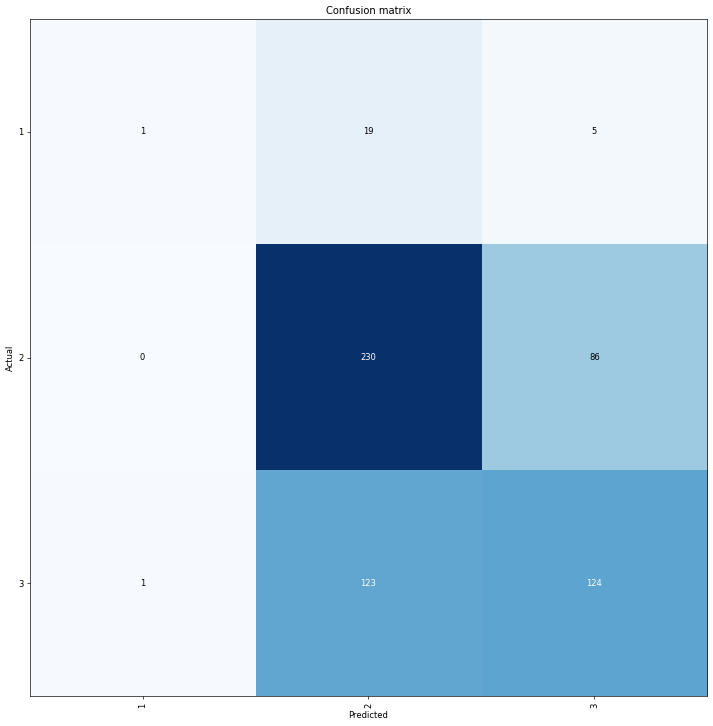

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('3', '2', 123), ('2', '3', 86), ('1', '2', 19), ('1', '3', 5)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.863592,0.937796,0.373514,00:14
1,0.788926,0.776207,0.358234,00:14


In [0]:
learn.load('stage-1');

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


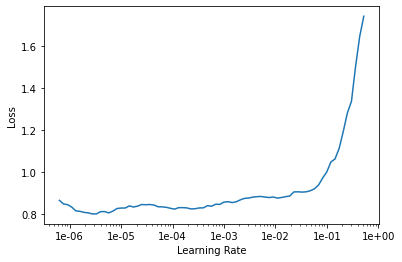

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.828569,0.785131,0.385399,00:14
1,0.801855,0.774011,0.365025,00:14


# Resnet 50

In [0]:
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=24, valid_pct=0.2, bs = 32)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2357 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,3,3,3,3
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Valid: LabelList (589 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,2,3,2,2
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


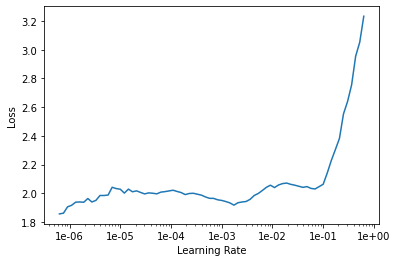

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.861891,1.678864,0.538200,00:15
1,1.451845,1.096976,0.446520,00:14
2,1.062459,0.943008,0.449915,00:14
3,0.921571,0.931804,0.410866,00:14
4,0.841837,0.911145,0.410866,00:14
5,0.829805,0.864549,0.415959,00:14
6,0.764728,0.875615,0.398981,00:14
7,0.762561,0.847939,0.402377,00:14


In [0]:
learn.save('stage-1-50')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.738783,0.850691,0.383701,00:15
1,0.746909,0.843907,0.395586,00:15
2,0.734984,0.831083,0.390492,00:15


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-1,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.864063,0.966588,0.480475,00:15
1,0.839578,0.904485,0.426146,00:15
2,0.813824,0.848731,0.438031,00:15


In [0]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (2357 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,3,3,3,3
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Valid: LabelList (589 items)
x: ImageList
Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24),Image (3, 24, 24)
y: CategoryList
3,2,3,2,2
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.756833,0.865504,0.387097,00:15
1,0.769272,0.841112,0.388795,00:15
2,0.707451,0.850936,0.370119,00:15


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('3', '2', 105), ('2', '3', 76), ('1', '2', 24), ('1', '3', 12)]

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

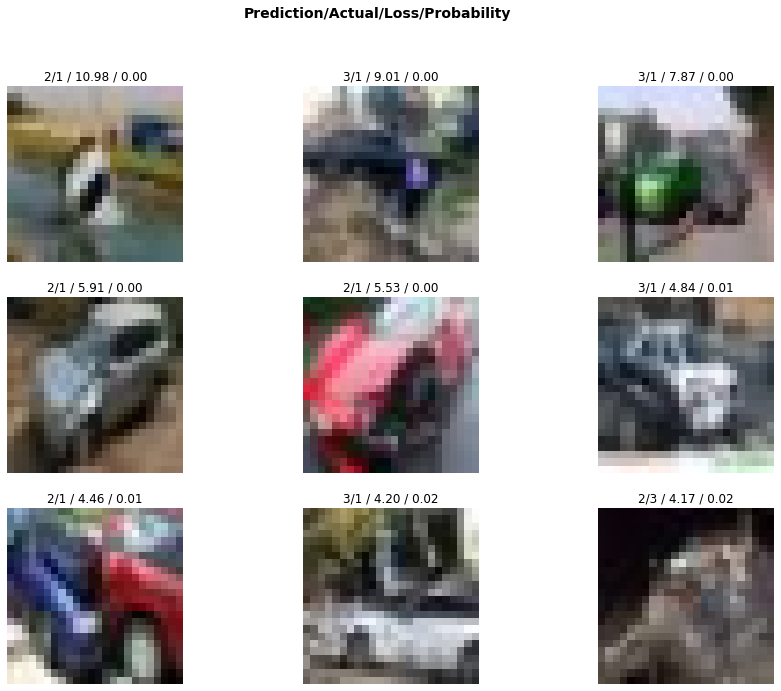

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

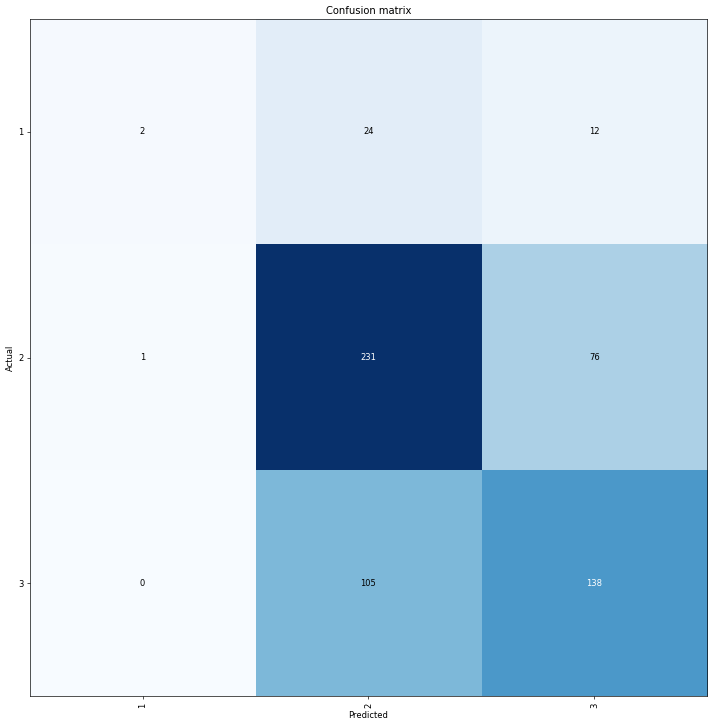

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Flipping images

In [0]:
tfms = get_transforms(do_flip=True, max_rotate=30)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, valid_pct=0.15, bs = 32)

In [0]:
len(train_ds)

2505

In [0]:
# train_ds, val_ds = data.train_ds, data.valid_ds

In [0]:
# from torch.utils.data import WeightedRandomSampler
# weights([0.5,0.25,0.25])

# sampler = WeightedRandomSampler(train_ds, num_samples=500)
# train_dl = DataLoader(train_ds, bs, sampler=sampler, num_workers=12)
# val_dl = DataLoader(val_ds, 2*bs, False, num_workers=8)
# db = ImageDataBunch(train_dl=train_dl, valid_dl=val_dl).normalize(imagenet_stats)

In [0]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (2505 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,3,3,3,3
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Valid: LabelList (441 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
3,2,2,3,2
Path: /content/gdrive/My Drive/Learning Sprint - Group 3/Accident-Severity;

Test: None

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


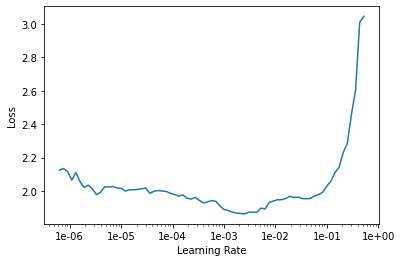

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.730647,1.430819,0.471655,02:32
1,1.304033,0.921785,0.387755,00:29
2,0.986703,0.732410,0.358277,00:30
3,0.875317,0.802677,0.383220,00:29
4,0.796405,0.683859,0.331066,00:29
5,0.752194,0.680331,0.351474,00:29
6,0.722113,0.651732,0.335601,00:29
7,0.701352,0.646229,0.328798,00:29


In [0]:
learn.save('stage-1-flip')

In [0]:
# learn.load('stage-1-flip')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.768950,0.945686,0.365079,00:32
1,0.863938,0.889044,0.319728,00:31
2,0.721590,0.585340,0.258503,00:31
3,0.583151,0.557825,0.233560,00:31


In [0]:
# learn.fit_one_cycle(2)

In [0]:
learn.save('stage-2-flip')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

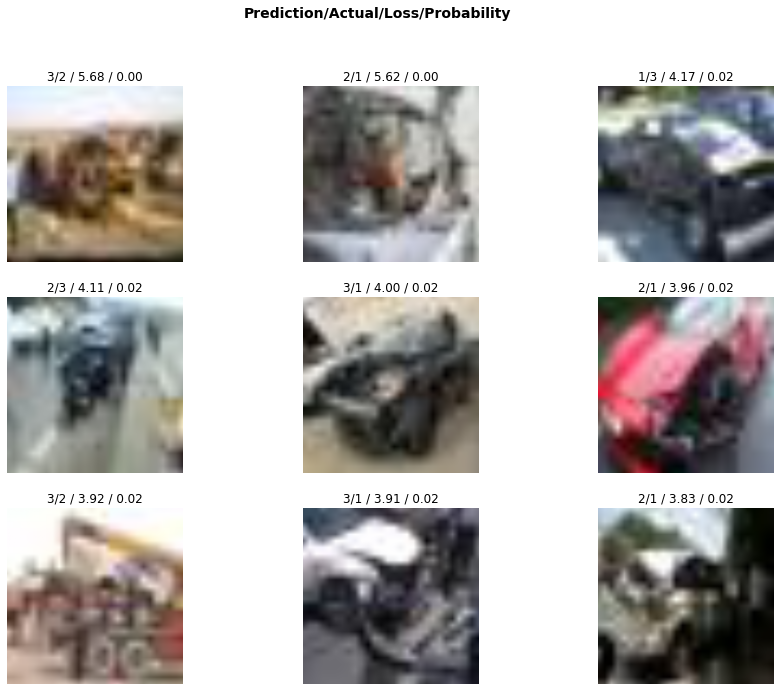

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

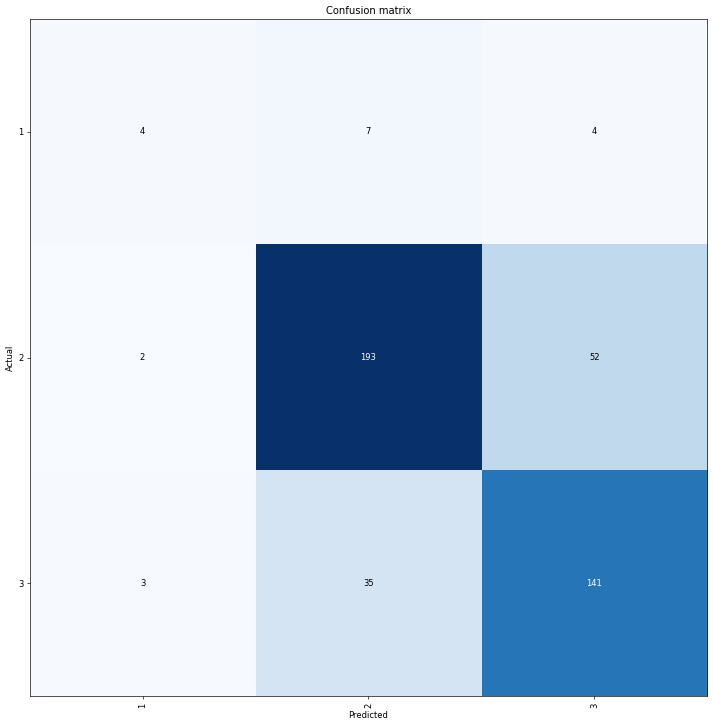

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)